In [1]:
import pickle as PKL
from tools import analysistools as atools
import os
import time
import glob
import numpy as np
import matplotlib.pyplot as plt
from nanoparticle import CoveredNanoParticlePhenome
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [185]:
DIRNAME = 'BT-36-6-1pickles'
BUFFER = -18
pickles = glob.glob("db/{}/*.p".format(DIRNAME))

In [186]:
len(pickles)

17009

In [187]:
grouprots = {}
for pickle in pickles:
    pickleKey = pickle[:BUFFER]
    if pickleKey in grouprots:                    
        grouprots[pickleKey].append(pickle)
    else:
        grouprots[pickleKey] = [pickle]
print(len(grouprots.keys()))
print(np.average([len(i) for i in grouprots.values()]))

2829
6.012371862849063


In [209]:
opvstuff = []
fitvstuff = []
totaliters = len(grouprots.keys())
currentiter = 0
sTime = time.time()
for _, pickleList in grouprots.items():    
    if currentiter % 50 == 0:
        print('{}/{}'.format(currentiter,totaliters))
        print('{}s'.format(time.time() - sTime))
    currentiter += 1
    jTLT = []
    jALT = []
    jMAXLT = []
    jMINLT = []
    mTLT = []
    mALT = []
    mMAXLT = []
    mMINLT = []
    xxjSUM = []
    for p in pickleList:
        #0: contactData,1: no. ligands,2: NP,3: rot1,4: rot2,5: fitness (pp),6: budTime
        data = PKL.load(open(p))
        contactdata = data[0]
        budtime = data[6]
        #sTime = time.time()
        if not budtime:
            budtime = 250
        contactdata = atools.cleanContactData(contactdata, budtime)
        TjTLT, TjALT, TjMAXLT, TjMINLT = atools.jitterLigandContactLIFETIME(contactdata)
        jSUM = atools.jitterLigandContactSUM(contactdata)
        TmTLT, TmALT, TmMAXLT, TmMINLT = atools.metastableLIFETIME(contactdata)
        
        
        
        TjTLT, TjALT, TjMAXLT, TjMINLT = float(TjTLT)/float(budtime), float(TjALT)/float(budtime), float(TjMAXLT)/float(budtime), float(TjMINLT)/float(budtime)
        TmTLT, TmALT, TmMAXLT, TmMINLT = float(TmTLT)/float(budtime), float(TmALT)/float(budtime), float(TmMAXLT)/float(budtime), float(TmMINLT)/float(budtime)
        jSUM = float(jSUM)/float(budtime)
        
        fitness = None        
        if data[5] == 400:
            fitness = data[5] + (600.0*(1.0 - (budtime/25000.0)))
            fitvstuff.append(((fitness),(TjTLT, TjALT, TjMAXLT, TjMINLT, TmTLT, TmALT, TmMAXLT, TmMINLT, jSUM)))
        else:
            fitness = data[5]
                    
        jTLT.append(TjTLT)
        jALT.append(TjALT)
        jMAXLT.append(TjMAXLT)
        jMINLT.append(TjMINLT)
        mTLT.append(TmTLT)
        mALT.append(TmALT)
        mMAXLT.append(TmMAXLT)
        mMINLT.append(TmMINLT)
        xxjSUM.append(jSUM)
        
    AjTLT = np.average(jTLT)
    AjALT = np.average(jALT)
    AjMAXLT = np.average(jMAXLT)
    AjMINLT = np.average(jMINLT)
    AmTLT = np.average(mTLT)
    AmALT = np.average(mALT)
    AmMAXLT = np.average(mMAXLT)
    AmMINLT = np.average(mMINLT)
    AxxjSUM = np.average(xxjSUM)
    
    particle = data[2]
    particle.ligands = [lig for lig in particle.ligands if lig.eps>0.0]
    
    class Object(object):
        pass
    
    phenome = Object()
    phenome.particle = particle
    ind = {'phenome': phenome}
    LCAVG = atools.lineyChainSizeAVG(ind)
    LCMAX = atools.lineyChainSizeMAX(ind)
    LLAVG = atools.lineyLineSizeAVG(ind)
    LLMAX = atools.lineyLineSizeMAX(ind)
    
    opvstuff.append(((LCAVG, LCMAX, LLAVG, LLMAX),(AjTLT, AjALT, AjMAXLT, AjMINLT, AmTLT, AmALT, AmMAXLT, AmMINLT, AxxjSUM)))        

0/2829
0.00287103652954s
50/2829
11.2633199692s
100/2829
21.9508850574s
150/2829
31.3678050041s
200/2829
41.3369050026s
250/2829
51.1246800423s
300/2829
60.4618549347s
350/2829
70.0445621014s
400/2829
79.6855621338s
450/2829
92.1793401241s
500/2829
103.226959944s
550/2829
112.612658024s
600/2829
122.079186916s
650/2829
131.211796045s
700/2829
141.011966944s
750/2829
150.937865973s
800/2829
160.963598967s
850/2829
170.527161121s
900/2829
180.006962061s
950/2829
189.587044001s
1000/2829
200.23722291s
1050/2829
209.509824991s
1100/2829
219.241148949s
1150/2829
231.212729931s
1200/2829
243.086383104s
1250/2829
253.433214903s
1300/2829
263.421804905s
1350/2829
272.938947916s
1400/2829
282.899838924s
1450/2829
292.611872911s
1500/2829
302.267594099s
1550/2829
312.129522085s
1600/2829
321.768193007s
1650/2829
334.446914911s
1700/2829
348.031790972s
1750/2829
363.550229073s
1800/2829
377.933975935s
1850/2829
393.901010036s
1900/2829
409.883177042s
1950/2829
422.635565042s
2000/2829
435.4840350

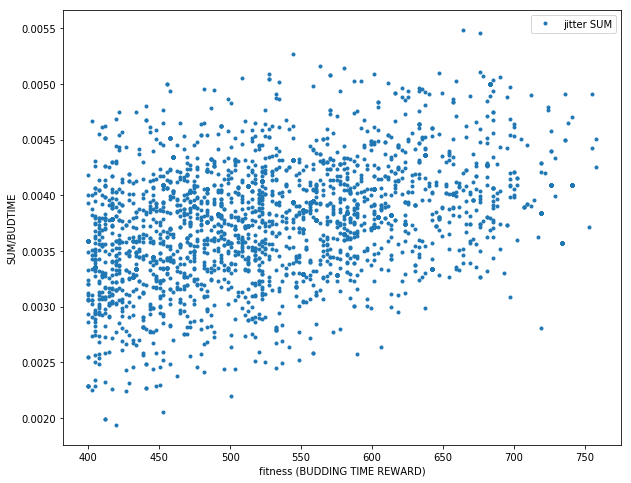

In [210]:
#plt.plot([i[0] for i in fitvstuff], [i[1][0] for i in fitvstuff], '.', label='jitter total lifetime')
#plt.plot([i[0] for i in fitvstuff], [i[1][1] for i in fitvstuff], '.', label='jitter average lifetime')
#plt.plot([i[0] for i in fitvstuff], [i[1][2] for i in fitvstuff], '.', label='jitter max lifetime')
#plt.plot([i[0] for i in fitvstuff], [i[1][3] for i in fitvstuff], '.', label='jitter min lifetime')
#plt.plot([i[0] for i in fitvstuff], [i[1][4] for i in fitvstuff], '.', label='stable total lifetime')
#plt.plot([i[0] for i in fitvstuff], [i[1][5] for i in fitvstuff], '.', label='stable average lifetime')
#plt.plot([i[0] for i in fitvstuff], [i[1][6] for i in fitvstuff], '.', label='stable max lifetime')
#plt.plot([i[0] for i in fitvstuff], [i[1][7] for i in fitvstuff], '.', label='stable min lifetime')
plt.plot([i[0] for i in fitvstuff], [i[1][8] for i in fitvstuff], '.', label='jitter SUM')
plt.xlabel('fitness (BUDDING TIME REWARD)')
plt.ylabel('SUM/BUDTIME')
plt.legend()
plt.show();

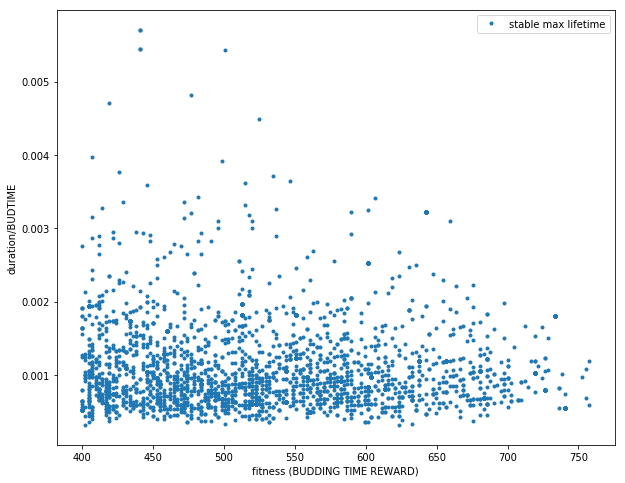

In [211]:
#plt.plot([i[0] for i in fitvstuff], [i[1][0] for i in fitvstuff], '.', label='jitter total lifetime')
#plt.plot([i[0] for i in fitvstuff], [i[1][1] for i in fitvstuff], '.', label='jitter average lifetime')
#plt.plot([i[0] for i in fitvstuff], [i[1][2] for i in fitvstuff], '.', label='jitter max lifetime')
#plt.plot([i[0] for i in fitvstuff], [i[1][3] for i in fitvstuff], '.', label='jitter min lifetime')
#plt.plot([i[0] for i in fitvstuff], [i[1][4] for i in fitvstuff], '.', label='stable total lifetime')
#plt.plot([i[0] for i in fitvstuff], [i[1][5] for i in fitvstuff], '.', label='stable average lifetime')
plt.plot([i[0] for i in fitvstuff], [i[1][6] for i in fitvstuff], '.', label='stable max lifetime')
#plt.plot([i[0] for i in fitvstuff], [i[1][7] for i in fitvstuff], '.', label='stable min lifetime')
#plt.plot([i[0] for i in fitvstuff], [i[1][8] for i in fitvstuff], '.', label='jitter SUM')
plt.xlabel('fitness (BUDDING TIME REWARD)')
plt.ylabel('duration/BUDTIME')
plt.legend()
plt.show();

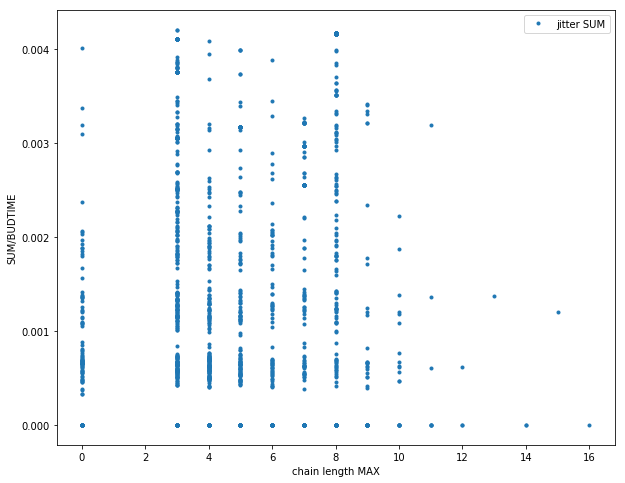

In [212]:
#plt.plot([i[0][3] for i in opvstuff], [i[1][0] for i in opvstuff], '.', label='average jitter total lifetime')
#plt.plot([i[0][3] for i in opvstuff], [i[1][1] for i in opvstuff], '.', label='average jitter average lifetime')
#plt.plot([i[0][3] for i in opvstuff], [i[1][2] for i in opvstuff], '.', label='average jitter max lifetime')
#plt.plot([i[0][3] for i in opvstuff], [i[1][3] for i in opvstuff], '.', label='average jitter min lifetime')
#plt.plot([i[0][3] for i in opvstuff], [i[1][4] for i in opvstuff], '.', label='average stable total lifetime')
#plt.plot([i[0][3] for i in opvstuff], [i[1][5] for i in opvstuff], '.', label='average stable average lifetime')
#plt.plot([i[0][3] for i in opvstuff], [i[1][6] for i in opvstuff], '.', label='average stable max lifetime')
#plt.plot([i[0][3] for i in opvstuff], [i[1][7] for i in opvstuff], '.', label='average stable min lifetime')
plt.plot([i[0][3] for i in opvstuff], [i[1][8] for i in opvstuff], '.', label='jitter SUM')
plt.xlabel('chain length MAX')
plt.ylabel('SUM/BUDTIME')
plt.legend()
plt.show();

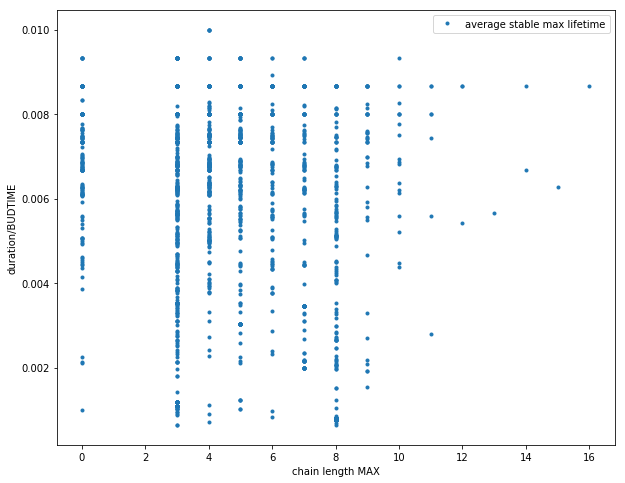

In [213]:
#plt.plot([i[0][3] for i in opvstuff], [i[1][0] for i in opvstuff], '.', label='average jitter total lifetime')
#plt.plot([i[0][3] for i in opvstuff], [i[1][1] for i in opvstuff], '.', label='average jitter average lifetime')
#plt.plot([i[0][3] for i in opvstuff], [i[1][2] for i in opvstuff], '.', label='average jitter max lifetime')
#plt.plot([i[0][3] for i in opvstuff], [i[1][3] for i in opvstuff], '.', label='average jitter min lifetime')
#plt.plot([i[0][3] for i in opvstuff], [i[1][4] for i in opvstuff], '.', label='average stable total lifetime')
#plt.plot([i[0][3] for i in opvstuff], [i[1][5] for i in opvstuff], '.', label='average stable average lifetime')
plt.plot([i[0][3] for i in opvstuff], [i[1][6] for i in opvstuff], '.', label='average stable max lifetime')
#plt.plot([i[0][3] for i in opvstuff], [i[1][7] for i in opvstuff], '.', label='average stable min lifetime')
#plt.plot([i[0][3] for i in opvstuff], [i[1][8] for i in opvstuff], '.', label='jitter SUM')
plt.xlabel('chain length MAX')
plt.ylabel('duration/BUDTIME')
plt.legend()
plt.show();

In [208]:
# #plt.plot([i[0][0] for i in opvstuff], [i[1][0] for i in opvstuff], '.', label='average jitter total lifetime')
# #plt.plot([i[0][0] for i in opvstuff], [i[1][1] for i in opvstuff], '.', label='average jitter average lifetime')
# #plt.plot([i[0][0] for i in opvstuff], [i[1][2] for i in opvstuff], '.', label='average jitter max lifetime')
# #plt.plot([i[0][0] for i in opvstuff], [i[1][3] for i in opvstuff], '.', label='average jitter min lifetime')
# #plt.plot([i[0][0] for i in opvstuff], [i[1][4] for i in opvstuff], '.', label='average stable total lifetime')
# #plt.plot([i[0][0] for i in opvstuff], [i[1][5] for i in opvstuff], '.', label='average stable average lifetime')
# plt.plot([i[0][0] for i in opvstuff], [i[1][6] for i in opvstuff], '.', label='average stable max lifetime')
# #plt.plot([i[0][0] for i in opvstuff], [i[1][7] for i in opvstuff], '.', label='average stable min lifetime')
# #plt.plot([i[0][0] for i in opvstuff], [i[1][8] for i in opvstuff], '.', label='jitter SUM')
# plt.xlabel('chain length AVG')
# plt.ylabel('duration/BUDTIME')
# plt.legend()
# plt.show();

In [166]:
# #plt.plot([i[0][1] for i in opvstuff], [i[1][0] for i in opvstuff], '.', label='average jitter total lifetime')
# #plt.plot([i[0][1] for i in opvstuff], [i[1][1] for i in opvstuff], '.', label='average jitter average lifetime')
# #plt.plot([i[0][1] for i in opvstuff], [i[1][2] for i in opvstuff], '.', label='average jitter max lifetime')
# #plt.plot([i[0][1] for i in opvstuff], [i[1][3] for i in opvstuff], '.', label='average jitter min lifetime')
# #plt.plot([i[0][1] for i in opvstuff], [i[1][4] for i in opvstuff], '.', label='average stable total lifetime')
# #plt.plot([i[0][1] for i in opvstuff], [i[1][5] for i in opvstuff], '.', label='average stable average lifetime')
# plt.plot([i[0][1] for i in opvstuff], [i[1][6] for i in opvstuff], '.', label='average stable max lifetime')
# #plt.plot([i[0][1] for i in opvstuff], [i[1][7] for i in opvstuff], '.', label='average stable min lifetime')
# plt.plot([i[0][1] for i in opvstuff], [i[1][8] for i in opvstuff], '.', label='jitter SUM')
# plt.xlabel('chain length MAX')
# plt.ylabel('duration/BUDTIME')
# plt.legend()
# plt.show();

In [167]:
# #plt.plot([i[0][2] for i in opvstuff], [i[1][0] for i in opvstuff], '.', label='average jitter total lifetime')
# #plt.plot([i[0][2] for i in opvstuff], [i[1][1] for i in opvstuff], '.', label='average jitter average lifetime')
# #plt.plot([i[0][2] for i in opvstuff], [i[1][2] for i in opvstuff], '.', label='average jitter max lifetime')
# #plt.plot([i[0][2] for i in opvstuff], [i[1][3] for i in opvstuff], '.', label='average jitter min lifetime')
# #plt.plot([i[0][2] for i in opvstuff], [i[1][4] for i in opvstuff], '.', label='average stable total lifetime')
# #plt.plot([i[0][2] for i in opvstuff], [i[1][5] for i in opvstuff], '.', label='average stable average lifetime')
# plt.plot([i[0][2] for i in opvstuff], [i[1][6] for i in opvstuff], '.', label='average stable max lifetime')
# #plt.plot([i[0][2] for i in opvstuff], [i[1][7] for i in opvstuff], '.', label='average stable min lifetime')
# plt.plot([i[0][2] for i in opvstuff], [i[1][8] for i in opvstuff], '.', label='jitter SUM')
# plt.xlabel('line length AVG')
# plt.ylabel('duration/BUDTIME')
# plt.legend()
# plt.show();